# Showcase how to run and plot a simulation of virtual Argo floats

Here only trajectories are looked at, not measurements collected by floats.

The deployment is taken from the real Argo array using [argopy](http://github.com/euroargodev/argopy)

If you run this notebook on Binder, velocity data have automatically been downloaded.

The velocity fields used is from the 1/12 Mercator forecast ([GLOBAL-ANALYSIS-FORECAST-PHY-001-024](https://resources.marine.copernicus.eu/?option=com_csw&task=results?option=com_csw&view=details&product_id=GLOBAL_ANALYSIS_FORECAST_PHY_001_024)).

This notebook is for demonstration purposes only, so the velocity field is limited to the 1st day of each 2019 months (i.e. 12 fields).

***
Script prepared by [K Balem](http://github.com/quai20) andf [G Maze](http://github.com/gmaze) (Jun. 2020)

This work is part and was supported by the following projects:
<div>
<img src="https://avatars1.githubusercontent.com/u/58258213?s=460&v=4" width="70"/>
<img src="https://github.com/euroargodev/euroargodev.github.io/raw/master/img/logo/ArgoFrance-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>

In [1]:
import sys
import numpy as np
import xarray as xr
import pandas as pd

sys.path.insert(0, "..") # This is while waiting for the pypi integration
import virtualargofleet as vaf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[0.4,0.6,0.7])

# Set-up the velocity field

In [2]:
# Set how to find the velocity field
# src = "/home/datawork-lops-oh/somovar/WP1/data/GLOBAL-ANALYSIS-FORECAST-PHY-001-024" # Datarmor
# src = "/Users/gmaze/data/MERCATOR/data/GLOBAL-ANALYSIS-FORECAST-PHY-001-024" # Laptop
src = "/export/home/kbalem/Bureau/VirtualFleet/knotebooks/data" # Binder

filenames = {'U': src + "/2019*.nc",
             'V': src + "/2019*.nc"}
variables = {'U':'uo','V':'vo'}
dimensions = {'time': 'time', 'depth':'depth', 'lat': 'latitude', 'lon': 'longitude'}

In [3]:
# Ddefine the velocity field object of the VF:
# USAGE : obj = vaf.velocityfield(ds=filenames, var=variables, dim=dimensions, isglobal=0 or 1) 
VELfield = vaf.velocityfield(ds=filenames, var=variables, dim=dimensions, isglobal=0)

/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
INFO: Unable to locate chunking hints from dask, thus estimating the max. chunk size heuristically. Please consider defining the 'chunk-size' for 'array' in your local dask configuration file (see http://oceanparcels.org/faq.html#field_chunking_config and https://docs.dask.org).
/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/parcels/plotting.py:224: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. I

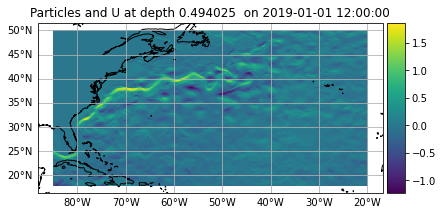

In [4]:
VELfield.plot()

# Define a deployment plan of virtual Argo floats

We use [argopy](https://github.com/euroargodev/argopy) to download the real Argo array deployments in the region.


In [5]:
import argopy
print(argopy.__version__)

from argopy import DataFetcher as ArgoDataFetcher
# from argopy import IndexFetcher as ArgoIndexFetcher

/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/argopy/stores/filesystems.py:18: UserWarning: argopy needs tqdm installed to display progress bars
  warnings.warn("argopy needs tqdm installed to display progress bars")
/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/argopy/plotters.py:41: UserWarning: argopy requires seaborn installed for full plotting functionality
  warnings.warn("argopy requires seaborn installed for full plotting functionality")


0.1.7


In [8]:
ds = ArgoDataFetcher(cache=0, mode='expert').region([-80, -30, 20, 48, 0, 100, '2019-01', '2019-06']).to_xarray()
ds_plan = ds.where(ds['CYCLE_NUMBER']==1, drop=True).argo.point2profile()
ds_plan = ds_plan.where(ds_plan['N_LEVELS']==0, drop=1).squeeze()
ds_plan = ds_plan.where(ds_plan['DIRECTION']=='A', drop=1)

In [9]:
print(ds_plan)

<xarray.Dataset>
Dimensions:                   (N_PROF: 17)
Coordinates:
    LATITUDE                  (N_PROF) float64 28.53 23.01 21.61 ... 43.49 43.49
  * N_PROF                    (N_PROF) int64 19 20 21 12 18 17 ... 10 9 8 7 5 6
    LONGITUDE                 (N_PROF) float64 -53.95 -61.92 ... -57.5 -57.5
    TIME                      (N_PROF) datetime64[ns] 2019-02-12T11:41:20 ......
    N_LEVELS                  int64 0
Data variables:
    CONFIG_MISSION_NUMBER     (N_PROF) float64 1.0 1.0 1.0 2.0 ... 2.0 1.0 1.0
    CYCLE_NUMBER              (N_PROF) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    DATA_MODE                 (N_PROF) object 'R' 'R' 'R' 'D' ... 'D' 'D' 'D'
    DIRECTION                 (N_PROF) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A'
    PLATFORM_NUMBER           (N_PROF) float64 6.903e+06 6.903e+06 ... 4.902e+06
    POSITION_QC               (N_PROF) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    PRES                      (N_PROF) float32 3.8 2.9 2.8 1.08 ... 0.4 0.4 0.4


In [10]:
# WMO of floats deployed in the region:
np.unique(ds_plan['PLATFORM_NUMBER'])

array([4902467., 4902470., 4903044., 4903050., 4903051., 4903054.,
       4903055., 4903056., 4903213., 4903214., 4903216., 4903218.,
       4903219., 4903220., 6902914., 6902915., 6902916.])

In [11]:
ds_traj = []
for wmo in ds_plan['PLATFORM_NUMBER']:
    ds_traj.append(ds.where(ds['PLATFORM_NUMBER']==wmo, drop=1).drop_vars(['N_LEVELS', 'N_PROF']))
ds_traj = xr.concat(ds_traj, dim='N_POINTS')
ds_traj = ds_traj.argo.point2profile()
print(ds_traj)

<xarray.Dataset>
Dimensions:                   (N_LEVELS: 100, N_PROF: 184)
Coordinates:
    LATITUDE                  (N_PROF) float64 28.56 23.03 28.53 ... 30.05 23.89
  * N_PROF                    (N_PROF) int64 2 1 151 0 162 ... 45 76 34 23 150
    LONGITUDE                 (N_PROF) float64 -53.99 -61.99 ... -68.0 -49.21
    TIME                      (N_PROF) datetime64[ns] 2019-02-10T06:52:00 ......
  * N_LEVELS                  (N_LEVELS) int64 0 1 2 3 4 5 ... 94 95 96 97 98 99
Data variables:
    CONFIG_MISSION_NUMBER     (N_PROF) int64 1 1 1 1 1 1 2 2 ... 2 4 5 4 4 4 4 4
    CYCLE_NUMBER              (N_PROF) int64 1 1 1 1 1 1 2 ... 10 10 12 10 10 12
    DATA_MODE                 (N_PROF) <U1 'R' 'R' 'R' 'R' ... 'D' 'D' 'D' 'D'
    DIRECTION                 (N_PROF) <U1 'D' 'D' 'A' 'D' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER           (N_PROF) int64 6902914 6902915 ... 4903044 4903220
    POSITION_QC               (N_PROF) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES     

In [12]:
# Mission parameters
parking_depth = 1000. #in m
profile_depth = 2000.
vertical_speed = 0.09 #in m/s
cycle_duration = 10. # in days
mission = {'parking_depth':parking_depth, 'profile_depth':profile_depth, 'vertical_speed':vertical_speed, 'cycle_duration':cycle_duration}

VFleet = vaf.virtualfleet(lat=ds_plan['LATITUDE'], lon=ds_plan['LONGITUDE'], depth=ds_plan['PRES'], time=ds_plan['TIME'], vfield=VELfield, mission=mission)

## Show deployment plan

/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


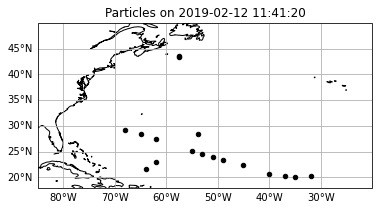

In [13]:
VFleet.plotfloat()

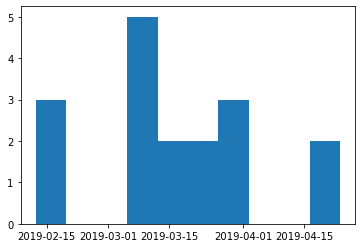

In [21]:
plt.hist(VFleet.time);

In [22]:
VFleet.pset

P[1](lon=-53.948143, lat=28.525528, depth=3.800000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=3627680.000000)
P[2](lon=-61.916790, lat=23.009594, depth=2.900000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=3800600.000000)
P[3](lon=-63.943901, lat=21.610901, depth=2.800000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=3801080.000000)
P[4](lon=-55.010239, lat=25.205410, depth=1.080000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=5610757.000000)
P[5](lon=-51.034512, lat=24.038630, depth=1.000000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=5682903.000000)
P[6](lon=-53.010319, lat=24.645760, depth=1.080000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=5697273.000000)
P[7](lon=-49.006489, lat=23.415430, depth=2.040000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=5729692.000000)
P[8](lon=-39.999298, lat=20.598669, depth=1.040000, cyc

# Run the virtual fleet simulation

In [23]:
%%time
# Define where to store results
run_outputs = "out"
output_file = run_outputs + '/test_%s.nc' % pd.to_datetime('now').strftime("%Y%m%d%H%M%S")
# output_file = run_outputs + '/test_20200629131707.nc'

# Run it:
VFleet.simulate(duration=365, dt_run=1./2, dt_out=1., output_file=output_file)

Simulation will be saved in : out/test_20210823085359.nc


INFO: Compiled ArgoParticleArgoVerticalMovementAdvectionRK4 ==> /tmp/parcels-500721/5544849f919e688a4a05a93624a610dc_0.so
INFO: Temporary output files are stored in out/out-IUZKSCRX.
INFO: You can use "parcels_convert_npydir_to_netcdf out/out-IUZKSCRX" to convert these to a NetCDF file during the run.
100% |########################################################################|


CPU times: user 2min 52s, sys: 4.07 s, total: 2min 56s
Wall time: 2min 56s


# Plot the virtual fleet simulation results

In [24]:
# Load simulation results:
simu = xr.open_dataset(output_file)
print(simu)

<xarray.Dataset>
Dimensions:      (obs: 8761, traj: 17)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory   (traj, obs) float64 ...
    time         (traj, obs) datetime64[ns] ...
    lat          (traj, obs) float32 ...
    lon          (traj, obs) float32 ...
    z            (traj, obs) float32 ...
    cycle_phase  (traj, obs) float32 ...
    cycle_age    (traj, obs) float32 ...
    drift_age    (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.1.4
    parcels_mesh:           spherical


In [25]:
# ID virtual floats to their real WMO:
print(np.unique(ds_plan['PLATFORM_NUMBER']))
simu['PLATFORM_NUMBER'] = xr.DataArray(np.full((len(simu['traj']),), 0), dims='traj')
wmos = []

x_real = np.round(ds_traj['LONGITUDE'], 5).values
y_real = np.round(ds_traj['LATITUDE'], 5).values
for i in simu['traj']:
    this = simu.isel(traj=i).sortby('time')
    x_virt = np.round(this.sel(obs=0)['lon'], 3).values
    y_virt = np.round(this.sel(obs=0)['lat'], 3).values
    ii = np.argmin(np.sqrt(np.power(x_real-x_virt,2) + np.power(y_real-y_virt,2)))
    wmo = np.array((ds_traj.isel(N_PROF=ii)['PLATFORM_NUMBER'].values,))[0]
    wmos.append(wmo)
#     print(wmo)
simu['PLATFORM_NUMBER'].values = wmos

[4902467. 4902470. 4903044. 4903050. 4903051. 4903054. 4903055. 4903056.
 4903213. 4903214. 4903216. 4903218. 4903219. 4903220. 6902914. 6902915.
 6902916.]


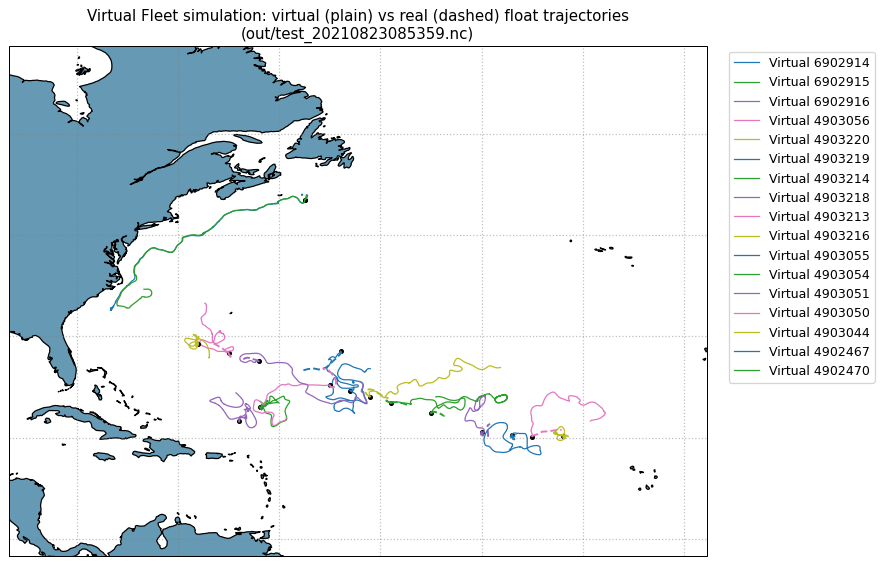

In [26]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

pr1 = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10), dpi=90)
ax3 = fig.add_subplot(1,1,1, projection=pr1)
ax3.add_feature(land_feature, edgecolor='black')
ax3.set_extent([simu.lon.min()-10, simu.lon.max()+10, simu.lat.min()-10, simu.lat.max()+10])
# ax3.set_extent([simu.lon.min()-10, simu.lon.max()+10, simu.lat.min()-10, 35])

gl = ax3.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle=':')

for i in simu['traj']:
    this = simu.isel(traj=i).sortby('time')
    ax3.plot(this['lon'][0], this['lat'][0],'k.', transform=pr1)
    pp_virt = ax3.plot(this['lon'], this['lat'], linewidth=1, transform=pr1, label="Virtual %s" % str(this['PLATFORM_NUMBER'].values))
    wmo = this['PLATFORM_NUMBER'].values
    this = ds_traj.where(ds_traj['PLATFORM_NUMBER']==wmo, drop=1)
    pp_real = ax3.plot(this['LONGITUDE'], this['LATITUDE'], '--')
#     pp_real = ax3.plot(this['LONGITUDE'], this['LATITUDE'], '--', label="Real %s" % str(wmo))
    plt.setp(pp_real[0], 'color', plt.getp(pp_virt[0], 'color'))

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title("Virtual Fleet simulation: virtual (plain) vs real (dashed) float trajectories\n(%s)" % output_file);

In [27]:
trj = simu.isel(traj=0)
# trj = simu.isel(traj=nfloats-1)
# trj = simu.where(simu['PLATFORM_NUMBER']==4903260, drop=1)
# trj = simu.where(simu['PLATFORM_NUMBER']==4903051, drop=1)

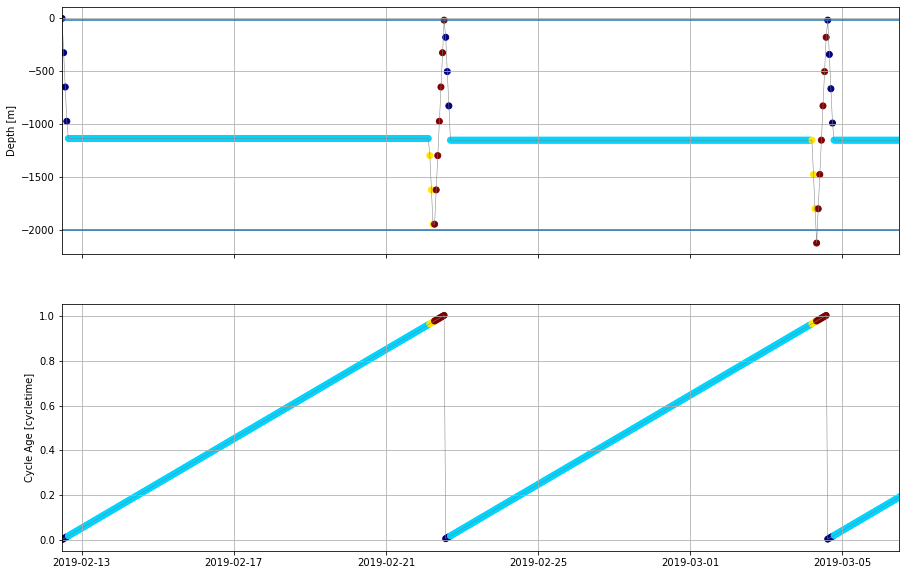

In [29]:
cycletime = 10 * 86400  # in s

dpt = trj['z']
y = trj['cycle_age']/cycletime
# y = trj['cycle_age']
# x = np.arange(0, len(y))
x = trj['time'].values

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)
ax = ax.flatten()

ax[0].plot(x, -dpt, 'gray', linewidth=0.5)
sc = ax[0].scatter(x, -dpt, c=trj['cycle_phase'], marker='o', cmap=mpl.cm.get_cmap('jet', 4))
ax[0].grid()
ax[0].set_ylabel('Depth [m]')
ax[0].hlines(-20,x[0], x[-1])
ax[0].hlines(-2000,x[0], x[-1])

ax[1].plot(x, y, 'gray', linewidth=0.5)
sc = ax[1].scatter(x, y, c=trj['cycle_phase'], marker='o', cmap=mpl.cm.get_cmap('jet', 4))
ax[1].set_ylabel('Cycle Age [cycletime]')
ax[1].grid()

# Only display the first float cycle
[i.set_xlim(x[0], x[int((cycletime/86400+1)*24*2/VFleet.run_params['dt_out'])]) for i in ax];

In [30]:
for i in simu['traj']:
    ds = simu.sel(traj=i)
    print(ds['PLATFORM_NUMBER'].values, " launched on :", ds['time'][0].values)

6902914  launched on : 2019-02-12T11:41:20.000000000
6902915  launched on : 2019-02-14T11:43:20.000000000
6902916  launched on : 2019-02-14T11:51:20.000000000
4903056  launched on : 2019-03-07T10:41:20.000000000
4903220  launched on : 2019-03-08T06:41:20.000000000
4903219  launched on : 2019-03-08T10:41:20.000000000
4903214  launched on : 2019-03-08T19:41:20.000000000
4903218  launched on : 2019-03-10T15:41:50.000000000
4903213  launched on : 2019-03-12T21:41:20.000000000
4903216  launched on : 2019-03-12T22:41:20.000000000
4903055  launched on : 2019-03-22T01:10:33.000000000
4903054  launched on : 2019-03-23T14:41:20.000000000
4903051  launched on : 2019-03-26T19:06:01.000000000
4903050  launched on : 2019-03-27T08:41:20.000000000
4903044  launched on : 2019-03-27T21:57:25.000000000
4902467  launched on : 2019-04-23T04:41:20.000000000
4902470  launched on : 2019-04-23T04:41:20.000000000
